In [1]:
# some outputs for the future, don't mind this block

FINDING_COR_ON_RADIOGRAMS_OUTPUT="""
Found anaconda at /home/dtasev/anaconda2/bin
 >> WARNING: No output path specified, no output will be produced!
Sample: [========================================]16 / 16
Data shape (16, 1964, 1070)
*********************************************
*
*     Running IMOPR with action COR. This works ONLY with sinograms
*
*********************************************
 ---Importing tool tomopy
 ---Tool loaded. Elapsed time: 5.57899475098e-05 sec.
Calculating projection angles..
Running COR for index 0 [ 688.8125]
Running COR for index 100 [ 1077.5234375]
Running COR for index 200 [ 690.484375]
Running COR for index 300 [ 687.140625]
Running COR for index 400 [ 683.796875]
Running COR for index 500 [ 677.109375]
Running COR for index 600 [ 671.2578125]
Running COR for index 700 [ 667.078125]
Running COR for index 800 [ 662.8984375]
Running COR for index 900 [ 661.2265625]
Running COR for index 1000 [ 662.48046875]
Running COR for index 1100 [ 665.40625]
Running COR for index 1200 [ 670.00390625]
Running COR for index 1300 [ 676.2734375]
Running COR for index 1400 [ 681.2890625]
Running COR for index 1500 [ 686.3046875]
Total execution time was 143.361360073 sec
"""

CONVERT_TO_SINOGRAMS_OUTPUT="""
Found anaconda at /home/dtasev/anaconda2/bin
Python 2.7.13 :: Anaconda custom (64-bit)
Sample: [========================================]1570 / 1570
Saving tif images: [========================================]1964 / 1964
Total execution time was 239.967664957 sec
"""

RECONSTRUCTION_RUN_OUTPUT="""
Found anaconda at /home/dtasev/anaconda2/bin
Python 2.7.13 :: Anaconda custom (64-bit)
 > Note: Progress bar library TQDM not available. To install locally please use pip install tqdm. Falling back to ASCII progress bar.
 > Note: Running process on 8 cores.
 ---Importing tool tomopy Memory usage before execution:  141980 KB, 138.65234375 MB
 ---Tool loaded. Elapsed time: 0.000333070755005 sec. Memory usage after execution:  141980 KB, 138.65234375 MB. Memory change: 0.0 MB
Sample: [========================================]1 / 1
 > Note: Predicted memory usage for data: 12585.9207153 MB
Sample: [========================================]1964 / 1964
 > Note: Running the default filtering.
 ---Starting non-iterative reconstruction algorithm with TomoPy. Mean COR: 539.683808554, Number of CORs provided 1964, Algorithm: gridrec... Memory usage before execution:  13063868 KB, 12757.6835938 MB
 ---Reconstructed 3D volume. Shape: (1964, 1070, 1070), and pixel data type: float32. Elapsed time: 252.014343977 sec. Memory usage after execution:  21832732 KB, 21321.0273438 MB. Memory change: 8563.34375 MB
 ---Starting saving slices of the reconstructed volume in: /home/dtasev/temp/presentation/reconstructed/reconstructed... Memory usage before execution:  21832732 KB, 21321.0273438 MB
Saving tif images: [========================================]1964 / 1964
 ---Finished saving slices of the reconstructed volume in: /home/dtasev/temp/presentation/reconstructed/reconstructed Elapsed time: 74.7704501152 sec. Memory usage after execution:  21832732 KB, 21321.0273438 MB. Memory change: 0.0 MB
Total execution time was 466.175639153 sec
"""

In [2]:
# Setup the package, this is done automatically with the startup scripts
import os
import sys

# Setup some constants
HOME = os.path.expanduser('~')
CHADWICK_PATH = os.path.join(HOME, 'temp', 'presentation')
CHADWICK_SAMPLE_PATH = os.path.join(CHADWICK_PATH, 'pre_processed')
SINOGRAMS_PATH = os.path.join(CHADWICK_PATH, 'sinograms')
SINOGRAMS_MLOG_PATH = os.path.join(CHADWICK_PATH, 'sinograms_mlog')
MANUAL_COR_OUTPUT_PATH = os.path.join(CHADWICK_PATH, 'manual_cor')
RECONSTRUCTION_OUTPUT_PATH = os.path.join(CHADWICK_PATH, 'reconstructed')
RECONSTRUCTION_READY_PATH = os.path.join(CHADWICK_PATH, 'RB1640003_tomopy_dimitar')
RECONSTRUCTION_READY_MEDIAN_PATH = os.path.join(CHADWICK_PATH, 'RB1640003_tomopy_dimitar_median')

ISIS_IMAGING_PATH = os.path.join(HOME, 'isis_imaging')
print(HOME, CHADWICK_PATH, ISIS_IMAGING_PATH)
sys.path[0]=ISIS_IMAGING_PATH

import isis_imaging
print(isis_imaging.__package__)

# Setup matplotlib to use the notebook backend
import matplotlib
matplotlib.use('nbagg')
from matplotlib import pyplot

# Create matplotlib objects
def show(image, idx=0):
    fig, img_axes = pyplot.subplots(nrows=1,ncols=1)
    
    image_obj = img_axes.imshow(image.get_sample()[idx], cmap='Greys_r')

    pyplot.show()

# import package from isis_imaging's GUI part
from isis_imaging.gui.stack_visualiser import sv_histogram

# python abuse to plot the histograms on the same plot, it works by default in the package

def plot_histograms_magically(data, idx1=0, idx2=None):
    # save the original function reference
    if idx2:
        temp_func_storage = sv_histogram._show
        def _temporary_empty_function(): pass
        # set to a function that does nothing
        sv_histogram.show_transparent(data.get_sample()[idx2].flatten(), "Normal Contrast", "")

        # restore so that the plot is shown next time
        sv_histogram._show = temp_func_storage

    sv_histogram.show_transparent(data.get_sample()[idx1].flatten(), "Low Contrast", "Magic")    

/home/dtasev /home/dtasev/temp/presentation /home/dtasev/isis_imaging
isis_imaging


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# Special function to make it seem like we are doing work

In [3]:
def pretend_to_be_executing(s, delay=2000):
    import time
    
    # convert to milliseconds for time.sleep()
    delay=delay/10000
    for line in s.split('\n'):
        time.sleep(delay)
        print(line)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# Load some data in

<IPython.core.display.Javascript object>


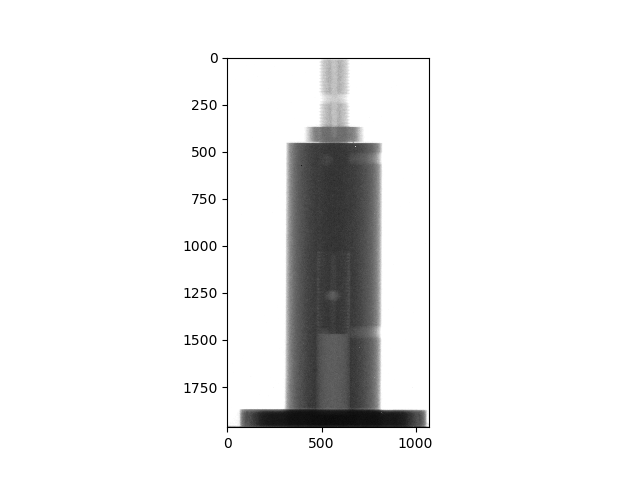

In [4]:
# Load some data in, format for indices is [start, end, step]
indices = [0, 1570, 100]

# use the package directly in a script/ipython/notebook
images = isis_imaging.io.loader.load(CHADWICK_SAMPLE_PATH, indices=indices)
show(images)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# Finding the COR

In [5]:
# only run on 2 images
import subprocess

# Another interface to the package: the CLI, used on SCARF
# does a command line call, exactly as if I typed it in the terminal. 

# This is the interface that will be used in the Reconstruction part
result = subprocess.run(['isis_imaging', '-i', CHADWICK_SAMPLE_PATH, \
                         '--indices', '340', '1570', '1500', \
                         '--imopr', 'cor'], stdout=subprocess.PIPE)
print(result.stdout.decode())

Found anaconda at /home/dtasev/anaconda2/bin
 >> WARNING: No output path specified, no output will be produced!
Sample: [========================================]1 / 1
Data shape (1, 1964, 1070)
*********************************************
*
*     Running IMOPR with action COR. This works ONLY with sinograms
*
*********************************************
 ---Importing tool tomopy
 ---Tool loaded. Elapsed time: 4.00543212891e-05 sec.
Calculating projection angles..
Running COR for index 340 [ 685.46875]
Total execution time was 8.04687309265 sec



In [7]:
pretend_to_be_executing(FINDING_COR_ON_RADIOGRAMS_OUTPUT)


Found anaconda at /home/dtasev/anaconda2/bin
 >> WARNING: No output path specified, no output will be produced!
Sample: [========================================]16 / 16
Data shape (16, 1964, 1070)
*********************************************
*
*     Running IMOPR with action COR. This works ONLY with sinograms
*
*********************************************
 ---Importing tool tomopy
 ---Tool loaded. Elapsed time: 5.57899475098e-05 sec.
Calculating projection angles..
Running COR for index 0 [ 688.8125]
Running COR for index 100 [ 1077.5234375]
Running COR for index 200 [ 690.484375]
Running COR for index 300 [ 687.140625]
Running COR for index 400 [ 683.796875]
Running COR for index 500 [ 677.109375]
Running COR for index 600 [ 671.2578125]
Running COR for index 700 [ 667.078125]
Running COR for index 800 [ 662.8984375]
Running COR for index 900 [ 661.2265625]
Running COR for index 1000 [ 662.48046875]
Running COR for index 1100 [ 665.40625]
Running COR for index 1200 [ 670.00390625

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Converting to Sinograms

<br>
## Sinogram - a row from each image, shows the movement of the row throughout the images
<br>

### This means that for sinograms you need _ALL_ of the information along the Z axis

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# How do sinograms look

<IPython.core.display.Javascript object>


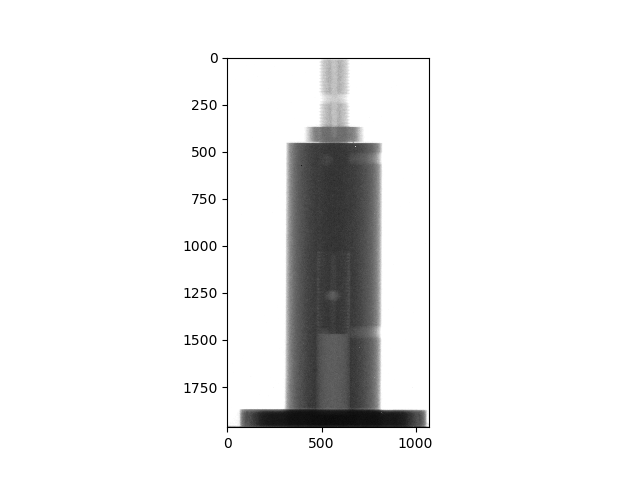

<IPython.core.display.Javascript object>


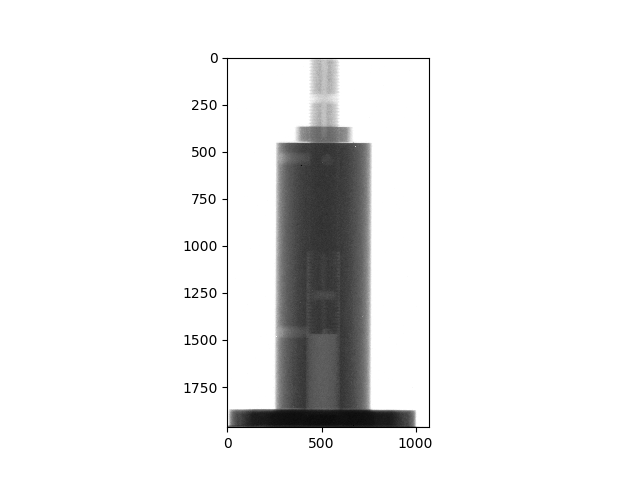

<IPython.core.display.Javascript object>


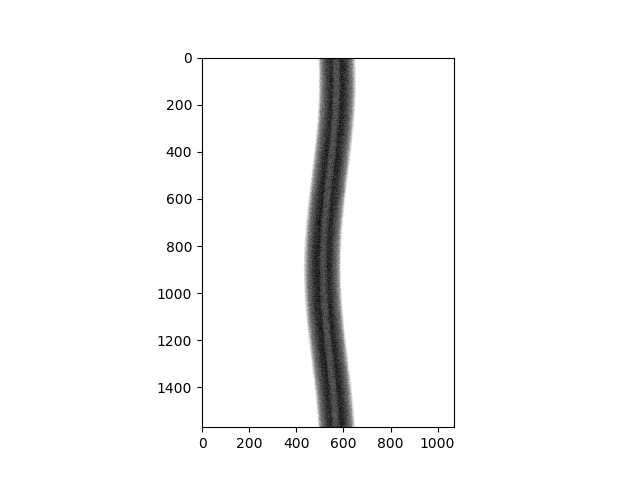

In [8]:
sinogram_indices = [0, 1960, 100]
sinograms = isis_imaging.io.loader.load(SINOGRAMS_PATH, indices=sinogram_indices)
show(images)
show(images, 9)
show(sinograms, 3) # this is the 200th row of EVERY projection from the stack

```python
# It would take too long to actually run in the presentation
import subprocess
result = subprocess.run(['isis_imaging', '-i', CHADWICK_SAMPLE_PATH, \
                        '-o', SINOGRAMS_PATH, '--convert', '--swap-axes'], stdout=subprocess.PIPE)
print(result.stdout.decode())
```

In [9]:
pretend_to_be_executing(CONVERT_TO_SINOGRAMS_OUTPUT, 3000)


Found anaconda at /home/dtasev/anaconda2/bin
Python 2.7.13 :: Anaconda custom (64-bit)
Sample: [========================================]1570 / 1570
Saving tif images: [========================================]1964 / 1964
Total execution time was 239.967664957 sec



<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# Why do we work with Sinograms and not the original slices?
Tomopy will implicitly convert the data to sinograms, if we send projections. This doubles the memory usage (and loses time converting the data). If we pass sinograms, we don't have surprise memory doubling.

It is specified through a `sinogram_order=True` flag in the actual Tomopy call:
```python
    recon = self._tomopy.recon(
        tomo=sample,
        theta=proj_angles,
        center=cors,
        ncore=cores,
        algorithm=alg,
        sinogram_order=True,
        **kwargs)
```


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Is that always the case with each tool?

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# How to use automatic approximation of COR

In [10]:
import subprocess
result = subprocess.run(['isis_imaging', '-i', SINOGRAMS_PATH, \
                         '--indices', '550', '600', '500', \
                         '--imopr', 'cor'], stdout=subprocess.PIPE)
print(result.stdout.decode())

Found anaconda at /home/dtasev/anaconda2/bin
 >> WARNING: No output path specified, no output will be produced!
Sample: [========================================]1 / 1
Data shape (1, 1570, 1070)
*********************************************
*
*     Running IMOPR with action COR. This works ONLY with sinograms
*
*********************************************
 ---Importing tool tomopy
 ---Tool loaded. Elapsed time: 7.31945037842e-05 sec.
Calculating projection angles..
Running COR for index 550 [ 676.2734375]
Total execution time was 7.23858714104 sec



<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# How to use manual finding of COR

In [11]:
import subprocess
result = subprocess.run(['isis_imaging', '-i', SINOGRAMS_PATH, \
                         '-o', MANUAL_COR_OUTPUT_PATH, \
                         '--indices', '550', '600', '50', \
                         '--imopr', '500', '600', '5', 'corwrite'], stdout=subprocess.PIPE)
print(result.stdout.decode())

Found anaconda at /home/dtasev/anaconda2/bin
Sample: [========================================]1 / 1
Data shape (1, 1570, 1070)
*********************************************
*
*     Running IMOPR with action COR using tomopy write_center. This works ONLY with sinograms!
*
*********************************************
 ---Importing tool tomopy
 ---Tool loaded. Elapsed time: 4.00543212891e-05 sec.
Calculating projection angles..
[500, 600, 5]
Starting writing CORs for slice 550 in /home/dtasev/temp/presentation/manual_cor/550
Finished writing CORs in /home/dtasev/temp/presentation/manual_cor
Total execution time was 4.61988186836 sec



<IPython.core.display.Javascript object>


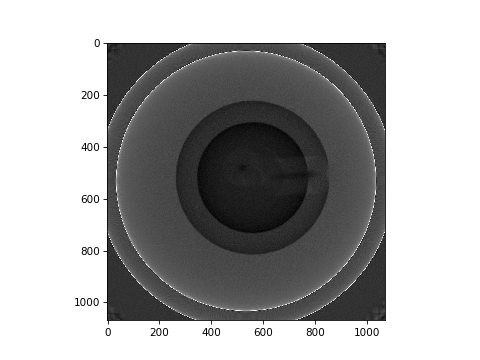

<IPython.core.display.Javascript object>


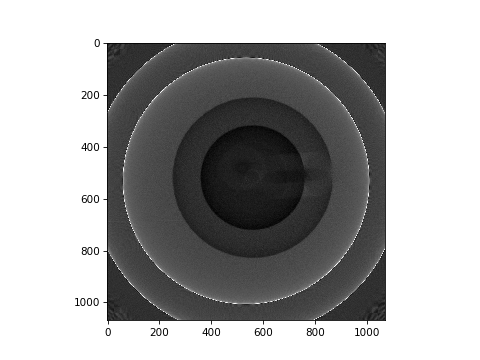

<IPython.core.display.Javascript object>


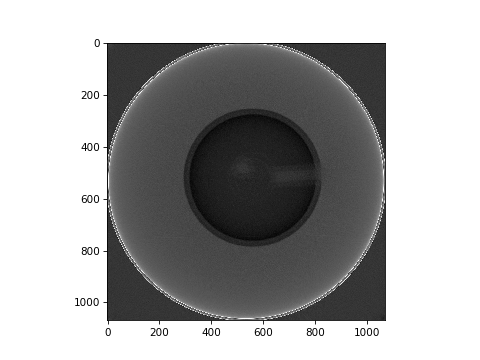

<IPython.core.display.Javascript object>


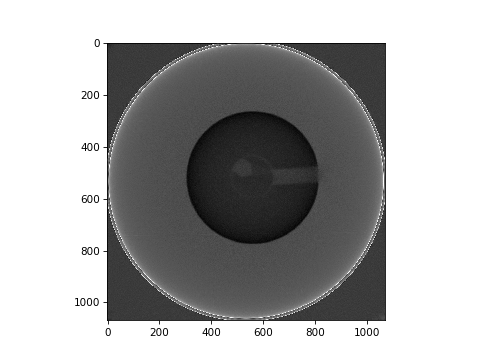

In [12]:
recon_slices = isis_imaging.io.loader.load(os.path.join(MANUAL_COR_OUTPUT_PATH, '550'), in_format='tiff')
show(recon_slices, 0) # too low COR
show(recon_slices, 19) # too high COR
show(recon_slices, 6) # Closer to the correct COR
show(recon_slices, 8) # just right

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# Running a reconstruction
## Setting up the reconstruction parameters

In [14]:
# Correct Reconstruction COR parameters
SLICE_CORS = [
  # Slice ID, Center of Rotation
    ('422',       '542'), 
    ('822',       '540'), 
    ('1222',      '540'), 
    ('1622',      '537'), 
    ('1822',      '536')
]

# Python 3 needs the list(...) as a gentle nudge, because zip is a generator
SLICE_IDS, CORS = list(zip(*SLICE_CORS))
print("Slices", SLICE_IDS)
print("Centers of Rotation", CORS)

Slices ('422', '822', '1222', '1622', '1822')
Centers of Rotation ('542', '540', '540', '537', '536')


## Trying to run a reconstruction

In [15]:
# Keep the same Centers of Rotation
# But add one more to the slice indices
# Now we have a slice that doesn't have a COR associated with it
WRONG_SLICE_IDS = (*SLICE_IDS, '1922',)
print(WRONG_SLICE_IDS)


# This will crash because we have not provided the same amount of CORs and slice IDs

import subprocess
result = subprocess.run(['isis_imaging', '-i', SINOGRAMS_PATH, \
                         '-o', RECONSTRUCTION_OUTPUT_PATH, \
                         '--reconstruction', \
                         '--cors', *CORS, \
                         '--cor-slices', *WRONG_SLICE_IDS, \
                         '-t', 'tomopy', \
                         '-a', 'gridrec'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(result.stderr.decode())

('422', '822', '1222', '1622', '1822', '1922')
Python 2.7.13 :: Anaconda custom (64-bit)
Traceback (most recent call last):
  File "/home/dtasev/isis_imaging/isis_imaging/main.py", line 68, in <module>
    main()
  File "/home/dtasev/isis_imaging/isis_imaging/main.py", line 23, in main
    config = recon_config.grab_full_config()
  File "/home/dtasev/isis_imaging/isis_imaging/core/configs/recon_config.py", line 41, in grab_full_config
    return ReconstructionConfig(functional_args, args)
  File "/home/dtasev/isis_imaging/isis_imaging/core/configs/recon_config.py", line 66, in __init__
    self.handle_special_arguments()
  File "/home/dtasev/isis_imaging/isis_imaging/core/configs/recon_config.py", line 117, in handle_special_arguments
    len_cor_slices))
ValueError: Centers of Rotation (len 5) doesn't match length of Slice Indices (len 6)!



<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Actually running the reconstruction
## Note: For visual comparison this data DOES NOT have Minus Log applied to it!

#### If we run this it would take 10 minutes!

```python
import subprocess
result = subprocess.run(['isis_imaging', '-i', SINOGRAMS_PATH, \
                         '-o', RECONSTRUCTION_OUTPUT_PATH, \
                         '--reconstruction', \
                         '--cors', *CORS, \
                         '--cor-slices', *SLICE_IDS, '-w'], stdout=subprocess.PIPE)
print(result.stdout.decode())
print(result.stderr.decode())
```

In [16]:
pretend_to_be_executing(RECONSTRUCTION_RUN_OUTPUT)


Found anaconda at /home/dtasev/anaconda2/bin
Python 2.7.13 :: Anaconda custom (64-bit)
 > Note: Progress bar library TQDM not available. To install locally please use pip install tqdm. Falling back to ASCII progress bar.
 > Note: Running process on 8 cores.
 ---Importing tool tomopy Memory usage before execution:  141980 KB, 138.65234375 MB
 ---Tool loaded. Elapsed time: 0.000333070755005 sec. Memory usage after execution:  141980 KB, 138.65234375 MB. Memory change: 0.0 MB
Sample: [========================================]1 / 1
 > Note: Predicted memory usage for data: 12585.9207153 MB
Sample: [========================================]1964 / 1964
 > Note: Running the default filtering.
 ---Starting non-iterative reconstruction algorithm with TomoPy. Mean COR: 539.683808554, Number of CORs provided 1964, Algorithm: gridrec... Memory usage before execution:  13063868 KB, 12757.6835938 MB
 ---Reconstructed 3D volume. Shape: (1964, 1070, 1070), and pixel data type: float32. Elapsed time: 

In [17]:
path = os.path.join(RECONSTRUCTION_OUTPUT_PATH, 'reconstructed')

root, dirs, files = next(os.walk(path))
print("\n".join(sorted(files)))

recon_slice_000000.tif
recon_slice_000001.tif
recon_slice_000002.tif
recon_slice_000003.tif
recon_slice_000004.tif
recon_slice_000005.tif
recon_slice_000006.tif
recon_slice_000007.tif
recon_slice_000008.tif
recon_slice_000009.tif
recon_slice_000010.tif
recon_slice_000011.tif
recon_slice_000012.tif
recon_slice_000013.tif
recon_slice_000014.tif
recon_slice_000015.tif
recon_slice_000016.tif
recon_slice_000017.tif
recon_slice_000018.tif
recon_slice_000019.tif
recon_slice_000020.tif
recon_slice_000021.tif
recon_slice_000022.tif
recon_slice_000023.tif
recon_slice_000024.tif
recon_slice_000025.tif
recon_slice_000026.tif
recon_slice_000027.tif
recon_slice_000028.tif
recon_slice_000029.tif
recon_slice_000030.tif
recon_slice_000031.tif
recon_slice_000032.tif
recon_slice_000033.tif
recon_slice_000034.tif
recon_slice_000035.tif
recon_slice_000036.tif
recon_slice_000037.tif
recon_slice_000038.tif
recon_slice_000039.tif
recon_slice_000040.tif
recon_slice_000041.tif
recon_slice_000042.tif
recon_slice

<IPython.core.display.Javascript object>


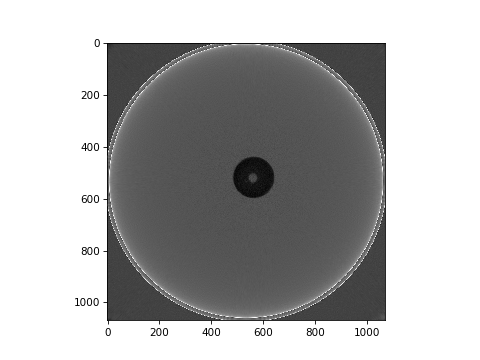

<IPython.core.display.Javascript object>


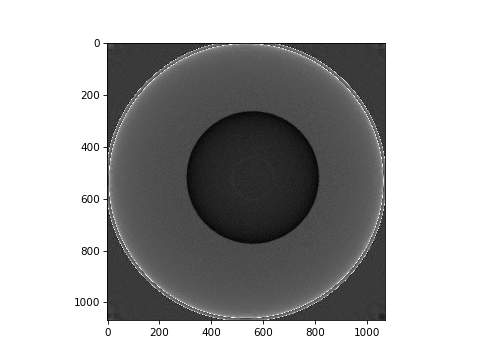

In [18]:
recon = isis_imaging.io.loader.load(path, indices=[300, 1900, 400])

show(recon)
show(recon, 1)

<IPython.core.display.Javascript object>


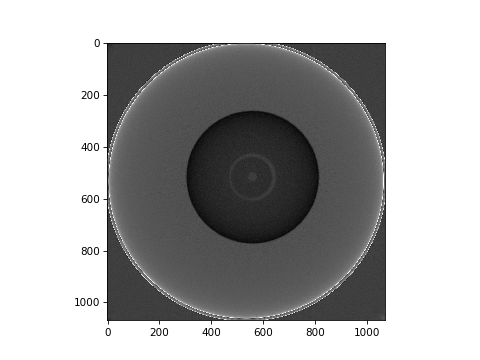

<IPython.core.display.Javascript object>


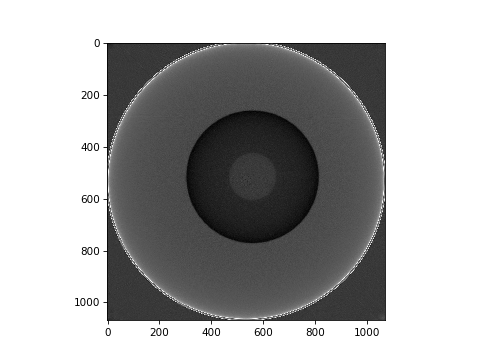

In [19]:
show(recon, 2)
show(recon, 3)

<IPython.core.display.Javascript object>


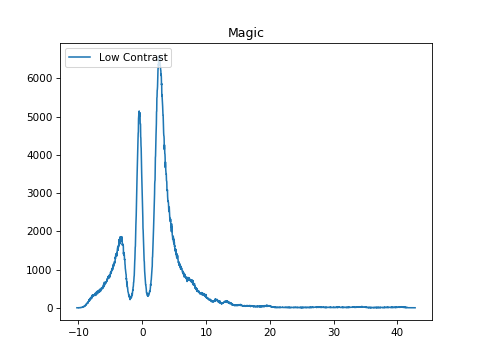

In [20]:
plot_histograms_magically(recon, 1)

# Visualising the Minus Log reconstruction

<IPython.core.display.Javascript object>


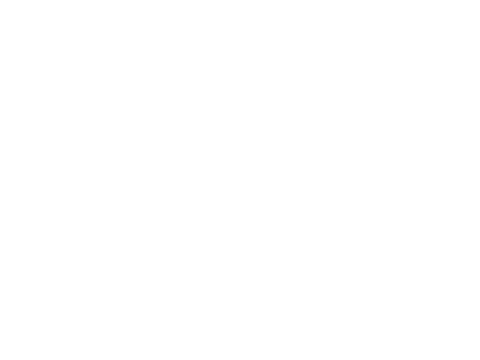

<IPython.core.display.Javascript object>


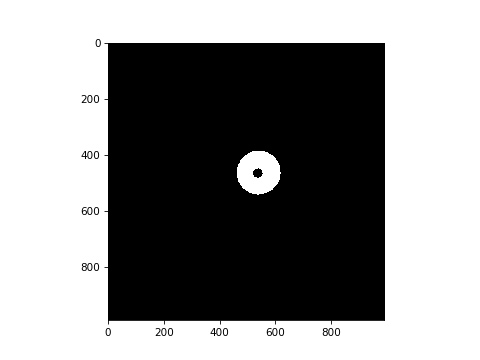

<IPython.core.display.Javascript object>


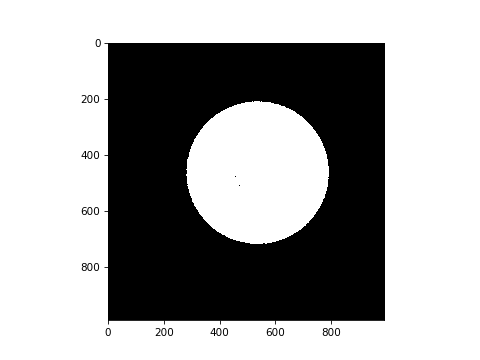

In [21]:
minus_log_recon = isis_imaging.io.loader.load(RECONSTRUCTION_READY_PATH, indices=[300, 1900, 400], in_format='tiff')

show(minus_log_recon)
show(minus_log_recon, 1)

<IPython.core.display.Javascript object>


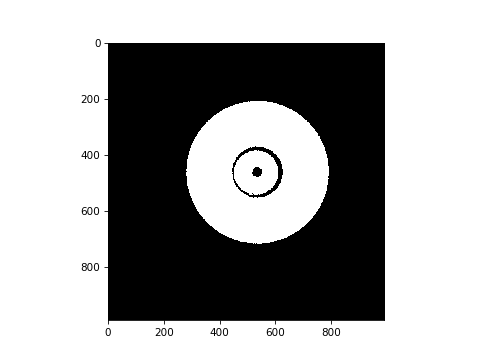

<IPython.core.display.Javascript object>


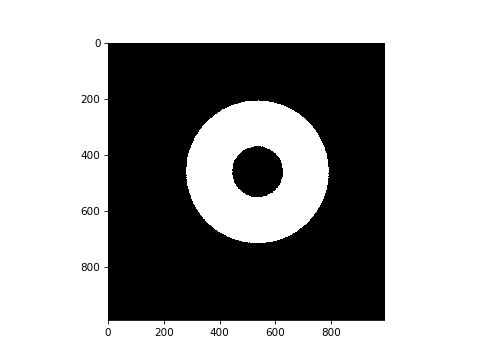

In [22]:
show(minus_log_recon, 2)
show(minus_log_recon, 3)

<IPython.core.display.Javascript object>


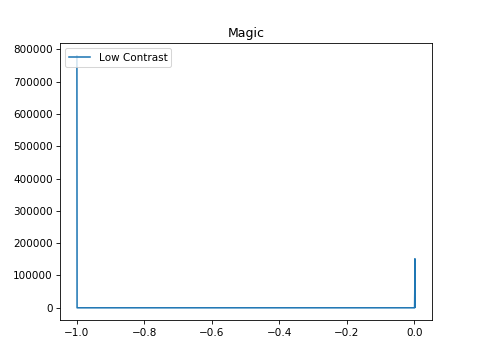

In [23]:
plot_histograms_magically(minus_log_recon, 1)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
# Taste-bud questionaire
https://docs.google.com/forms/d/198G7zfkuZXtIfxLevBv6vy5xxEcHqDyzR6AUvhcuwi0/edit
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>